## Hệ số Hồi quy tuyến tính

Trong notebook này, chúng ta sẽ lặp lại lựa chọn đặc trưng dựa trên các hệ số của biến được mô hình tuyến tính trả về. Lần này là trong trường hợp hồi quy.

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

In [11]:
# load tập dữ liệu
data = pd.read_csv('lab6-13_dataset/house-price/houseprice.csv')
data.shape

(1460, 81)

In [12]:
# Trên thực tế, nên thực hiện lựa chọn đặc trưng sau khi tiền xử lý dữ liệu,
# tất cả các biến hạng mục được mà hóa thành số
# và rồi chúng ta có thể đánh giá tính tất định của các mục tiêu

# để đơn giản, chúng ta sẽ chỉ sử dụng biến dạng số
# lựa chọn các cột số:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [13]:
# chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [14]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [15]:
## Yêu cầu 1
# các đặc trưng trong tập dữ liệu giá nhà ở các thang đo khác nhau
# nên chúng ta huấn luyện standardscaler để co giãn chúng

## VIẾT CODE Ở ĐÂY:
scaler =  StandardScaler()
scaler.fit(X_train)

StandardScaler()

<details><summary> Gợi ý </summary>

[StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

</details>

In [26]:
## Yêu cầu 2
# huấn luyện mô hình hồi quy tuyến tính và lựa chọn
# các đặc trưng có hệ số lớn hơn.

# đối tượng LinearRegression từ sklearn là phương thức tuyến tính không điều chuẩn.
# Nó khớp bởi phép nhân ma trận và không
# gradient descent.

# do đó, chúng ta không cần chỉ định penalty và các tham số khác

## VIẾT CODE Ở ĐÂY:
sel_ = SelectFromModel(LinearRegression())

## VIẾT CODE Ở ĐÂY:
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LinearRegression())

<details><summary> Gợi ý </summary>

[LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

</details>

In [27]:

# đếm số biến được chọn
selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

7

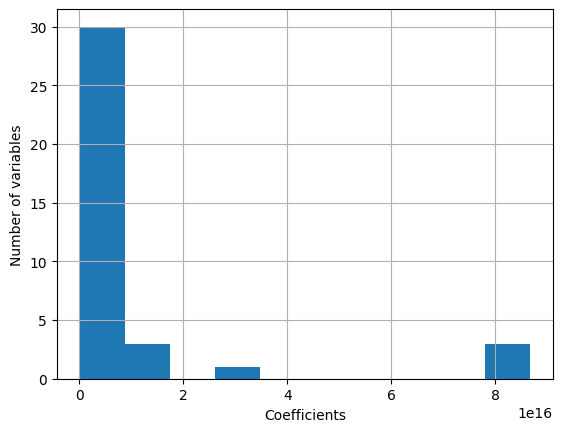

In [28]:
# vẽ biểu đồ tần suất của các giá trị tuyệt đối

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=10)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [25]:
## Yêu cầu 3
# so sánh lượng đặc trưng được chọn
# với lượng đặc trưng có hệ số cao hơn
# trung bình hệ số để đảm bảo chúng ta hiểu được kết quả của
# sklearn

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

## VIẾT CODE Ở ĐÂY:
print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

total features: 37
selected features: 7
features with coefficients greater than the mean coefficient: 7


<details><summary> Gợi ý </summary>

Using ```coef_``` attribute

</details>

Tương tự như trước, nó lựa chọn các đặc trung có hệ số lớn hơn trung bình của tất cả các hệ số.